[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Overall Sentiment Score: 0.29


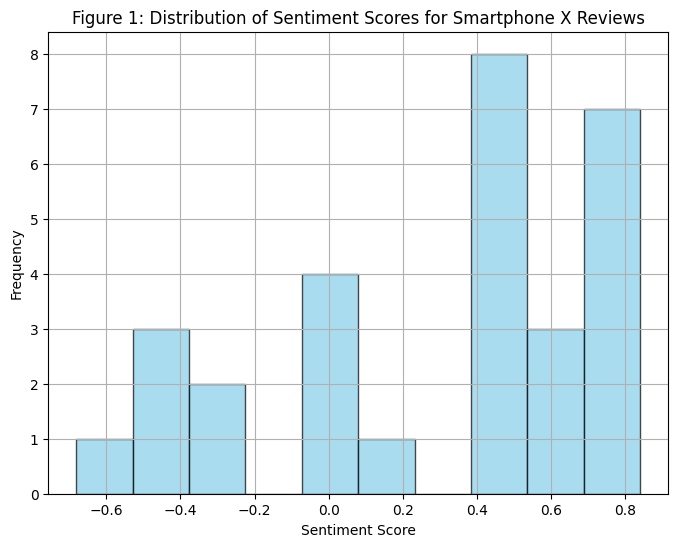

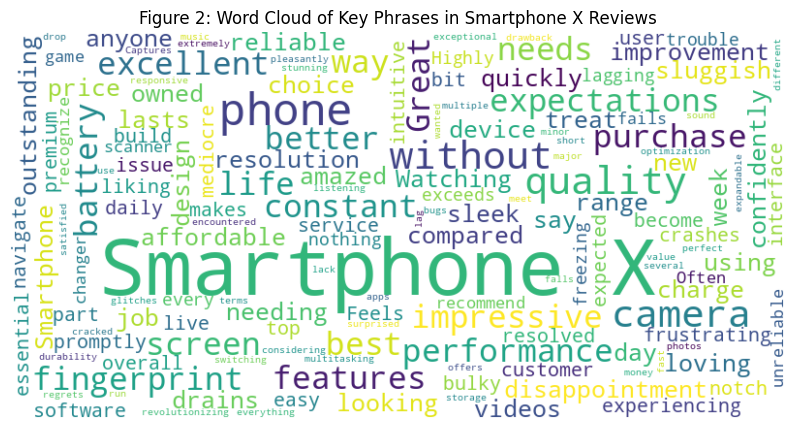


Observations and Recommendations:
Overall sentiment towards Smartphone X is positive.
Recommendation: Focus on maintaining the positive aspects such as camera quality, user-friendly design, and performance. Address areas of improvement like battery life and customer service.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

# Additional reviews focusing on Smartphone X
reviews = [
    "Smartphone X is a disappointment. The battery drains too quickly.",
    "I'm loving the new features on Smartphone X! Great job!",
    "Smartphone X has a sleek design, but the camera quality needs improvement.",
    "After using Smartphone X for a week, I can confidently say it's the best phone I've ever owned!",
    "The performance of Smartphone X is sluggish compared to other phones in its price range.",
    "I'm amazed by the battery life of Smartphone X. It lasts all day without needing a charge.",
    "Smartphone X is an excellent choice for anyone looking for a reliable and affordable device.",
    "The screen resolution of Smartphone X is outstanding. Watching videos is a treat!",
    "I'm experiencing constant software crashes on Smartphone X. Very frustrating.",
    "The customer service for Smartphone X is top-notch. They promptly resolved my issue.",
    "Smartphone X is a bit bulky for my liking, but the overall performance makes up for it.",
    "I can't live without Smartphone X! It's become an essential part of my daily life.",
    "The build quality of Smartphone X is impressive. Feels very premium.",
    "I expected better from Smartphone X. The camera is mediocre at best.",
    "The user interface of Smartphone X is intuitive and easy to navigate.",
    "I've had nothing but trouble with Smartphone X. Constant freezing and lagging.",
    "Smartphone X exceeds expectations in every way. Highly recommend it!",
    "The fingerprint scanner on Smartphone X is unreliable. Often fails to recognize my fingerprint.",
    "Smartphone X is a game-changer. It's revolutionizing the way we use smartphones.",
    "I'm pleasantly surprised by how fast and responsive Smartphone X is.",
    "The lack of expandable storage on Smartphone X is a major drawback for me.",
    "The sound quality on Smartphone X is exceptional. Great for listening to music.",
    "Smartphone X offers excellent value for the money. No regrets with this purchase.",
    "I'm considering switching to a different phone. Smartphone X doesn't meet my expectations.",
    "Smartphone X is perfect for multitasking. I can run multiple apps without any lag.",
    "The camera features on Smartphone X are impressive. Captures stunning photos.",
    "I've encountered several bugs and glitches on Smartphone X. Needs better optimization.",
    "Smartphone X falls short in terms of durability. The screen cracked after a minor drop.",
    "I'm extremely satisfied with my purchase of Smartphone X. It's everything I wanted in a phone."
]

# Preprocessing setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
sid = SentimentIntensityAnalyzer()

# Preprocessing and sentiment analysis
sentiment_scores = []
for review in reviews:
    tokens = word_tokenize(review.lower())
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    review = ' '.join(tokens)
    sentiment_score = sid.polarity_scores(review)['compound']
    sentiment_scores.append(sentiment_score)

# Calculate average sentiment score
average_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
print(f"Overall Sentiment Score: {average_sentiment_score:.2f}")


# Visualize sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(sentiment_scores, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Figure 1: Distribution of Sentiment Scores for Smartphone X Reviews')
plt.grid(True)
plt.show()

# Generate word cloud for key phrases
all_reviews_text = ' '.join(reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Figure 2: Word Cloud of Key Phrases in Smartphone X Reviews')
plt.axis('off')
plt.show()

# Observations and Recommendations
print("\nObservations and Recommendations:")
if average_sentiment_score > 0:
    print("Overall sentiment towards Smartphone X is positive.")
    print("Recommendation: Focus on maintaining the positive aspects such as camera quality, user-friendly design, and performance. Address areas of improvement like battery life and customer service.")
elif average_sentiment_score < 0:
    print("Overall sentiment towards Smartphone X is negative.")
    print("Recommendation: Identify and prioritize improvements in areas of dissatisfaction such as battery life, overheating issues, and software glitches. Enhance customer service to address user concerns effectively.")
else:
    print("Overall sentiment towards Smartphone X is neutral")
